Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Simulando interacción de 3 cuerpos...


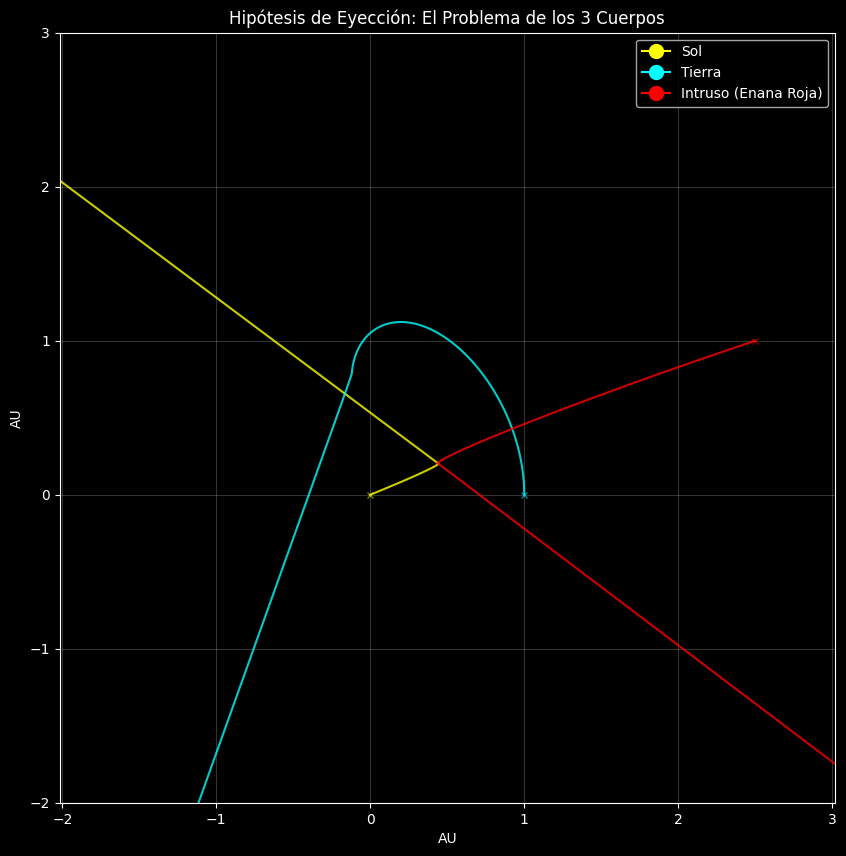

💥 ¿La Tierra sobrevivió o fue expulsada?


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. CONFIGURACIÓN ---
G = 4 * np.pi**2  # Gravedad
dt = 0.001        # Paso de tiempo
t_max = 2.0       # 2 años de simulación
steps = int(t_max / dt)

# --- 2. ACTORES DEL DRAMA CÓSMICO ---
# Formato: [Masa, Posición X, Posición Y, Vel X, Vel Y, Color]

bodies = [
    # C1: El Sol (Quieto en el centro)
    {"m": 1.0, "r": np.array([0.0, 0.0]), "v": np.array([0.0, 0.0]), "c": "yellow", "lbl": "Sol"},
    
    # C2: La Tierra (Orbita circular tranquila)
    {"m": 0.000003, "r": np.array([1.0, 0.0]), "v": np.array([0.0, 2*np.pi]), "c": "cyan", "lbl": "Tierra"},
    
    # C3: "El Intruso" (Una Estrella Enana que pasa cerca)
    # Viene desde lejos (X=2.5) y cruzará el sistema violentamente
    {"m": 0.5, "r": np.array([2.5, 1.0]), "v": np.array([-3.0, -1.0]), "c": "red", "lbl": "Intruso (Enana Roja)"}
]

# Historiales para graficar
histories = [ {"x": [], "y": []} for _ in bodies ]

# --- 3. MOTOR DE N-CUERPOS (Fuerza Bruta) ---
print(f"Simulando interacción de {len(bodies)} cuerpos...")

for _ in range(steps):
    # A. Calcular Fuerzas para TODOS los cuerpos
    forces = [np.array([0.0, 0.0]) for _ in bodies]
    
    for i in range(len(bodies)):
        for j in range(len(bodies)):
            if i != j: # No calcular gravedad sobre sí mismo
                r_vec = bodies[j]["r"] - bodies[i]["r"]  # Vector dirección
                dist = np.linalg.norm(r_vec)             # Distancia escalar
                
                # F = G * mi * mj / dist^3 * r_vec
                f = G * bodies[i]["m"] * bodies[j]["m"] / (dist**3) * r_vec
                forces[i] += f

    # B. Actualizar Posiciones (Euler-Cromer)
    for i in range(len(bodies)):
        # Guardar historial
        histories[i]["x"].append(bodies[i]["r"][0])
        histories[i]["y"].append(bodies[i]["r"][1])
        
        # a = F / m
        a = forces[i] / bodies[i]["m"]
        
        bodies[i]["v"] += a * dt # Velocidad
        bodies[i]["r"] += bodies[i]["v"] * dt # Posición

# --- 4. VISUALIZACIÓN DEL CAOS ---
plt.style.use('dark_background')
plt.figure(figsize=(10, 10))

for i, body in enumerate(bodies):
    # Trayectoria
    plt.plot(histories[i]["x"], histories[i]["y"], 
             color=body["c"], linestyle='-', linewidth=1.5, alpha=0.8)
    # Posición Final
    plt.plot(histories[i]["x"][-1], histories[i]["y"][-1], 
             marker='o', color=body["c"], markersize=10, label=body["lbl"])
    # Posición Inicial (Donde empezó)
    plt.plot(histories[i]["x"][0], histories[i]["y"][0], 
             marker='x', color=body["c"], markersize=5, alpha=0.5)

plt.title("Hipótesis de Eyección: El Problema de los 3 Cuerpos")
plt.xlabel("AU")
plt.ylabel("AU")
plt.legend()
plt.grid(True, alpha=0.2)
plt.axis('equal')
plt.xlim(-2, 3)
plt.ylim(-2, 3)

plt.show()
print("💥 ¿La Tierra sobrevivió o fue expulsada?")